# Cleaning the text 
- londonvenues csv undergoes EDA and cleaning of tips column. This will then be modelled against ABSA labeled training data to determine the sentiment.


In [14]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('./londonvenues.csv', encoding='utf-8')
print data.shape

(8355, 7)


In [16]:
data = data.drop(['venue_name', 'venue_id','rating', 'cat_name', 'cat_id'], axis=1 )
print data.shape

(8355, 2)


In [17]:
print data.isnull().sum()
df = data.dropna()
df = df.reset_index(drop=True)
print df.shape

tips    3176
ll         0
dtype: int64
(5179, 2)


In [18]:
lng=[]
lat=[]
for ll in df['ll']:
    lnglat = ll.split(',')
    lng.append(lnglat[0])
    lat.append(lnglat[0])
df['lng'] =lng
df['lat'] =lat
df.head()

,tips,ll,lng,lat
0,Great fun to be had by everyone. The aquarium ...,"51.4409815123,-0.0613689422607",51.4409815123,51.4409815123
1,Love this place my new local shop,"51.4669013,0.0528256",51.4669013,51.4669013
2,Enter our prize draw to win a family ticket to...,"51.501711493,-0.119767368051",51.501711493,51.501711493
3,"If you're pressed for time, head to Hall 2 for...","51.5352960617,-0.155888708427",51.5352960617,51.5352960617
4,Sea lion shows at 12pm and 3pm daily,"51.3495168852,-0.315634863588",51.3495168852,51.3495168852


In [19]:
tip = df.tips[2]
tip

u'Enter our prize draw to win a family ticket to Sea Life. And if you don\u2019t win, not to worry! Simply grab yourself a free 2 for 1 voucher and get 2 for 1 entry to any Sea Life location across the UK.'

# Text Pre-processing

Of all data text is the most unstructured form. In this case public reviews are not like articles so can contain errors like mispellings, slangs and a range of different writing styles. Therefore, various types of noise are present in the text which will need to be removed through cleaning and standardisation to minimize the noise as much as possible. These pre-processing steps help convert noise from high dimensional features (where N different features) to the low dimensional space.  

#### Decoding 
Throughout this work  Unicode string, make sure you are not using an encoded version of the string (it may be necessary to decode it first, e.g. with ``s.decode("utf8")``........


In [20]:
def decoding_text(text):
    try:
        clean = text.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = text
    return clean

### Noise Removal

#### Apostrophes
Apostrophes connecting words are used everywhere, espcially in public reviews. To maintain uniform structure throughout the whole text it is recommended to remove them inplace of the actual word. I found a dictionary of the most common apostrophe joined words. All the apostrophes in the texts should be converted into standard lexicons. This allows the text to follow the rules of context free grammar and helps avoids any word-sense disambiguation.


In [21]:
# %load ./NLP/appos.py
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [22]:
df.tips[2]

u'Enter our prize draw to win a family ticket to Sea Life. And if you don\u2019t win, not to worry! Simply grab yourself a free 2 for 1 voucher and get 2 for 1 entry to any Sea Life location across the UK.'

In [23]:
words = df.tips[2].split()
reformed = [appos[word] if word in appos else word for word in words]
reformed = " ".join(reformed) 
reformed

u'Enter our prize draw to win a family ticket to Sea Life. And if you don\u2019t win, not to worry! Simply grab yourself a free 2 for 1 voucher and get 2 for 1 entry to any Sea Life location across the UK.'

#### Lowercasing 
Normalising the case ensures that the words are treated equally. For example, 'Apple' and 'apple' are identified as the same word. 

In [24]:
df.tips[2]

u'Enter our prize draw to win a family ticket to Sea Life. And if you don\u2019t win, not to worry! Simply grab yourself a free 2 for 1 voucher and get 2 for 1 entry to any Sea Life location across the UK.'

In [25]:
lower_case = df.tips[2].lower()
lower_case

u'enter our prize draw to win a family ticket to sea life. and if you don\u2019t win, not to worry! simply grab yourself a free 2 for 1 voucher and get 2 for 1 entry to any sea life location across the uk.'

#### Tokenizing 
Tokenization is the process of converting text into tokens, normally these are words. These tokens split at white space and punctuation so  will now be easier to filter out unesseary tokens .... look up more? 


In [26]:
import nltk

In [27]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(df.tips[2])
print(tokens[:100])

[u'Enter', u'our', u'prize', u'draw', u'to', u'win', u'a', u'family', u'ticket', u'to', u'Sea', u'Life', u'.', u'And', u'if', u'you', u'don', u'\u2019', u't', u'win', u',', u'not', u'to', u'worry', u'!', u'Simply', u'grab', u'yourself', u'a', u'free', u'2', u'for', u'1', u'voucher', u'and', u'get', u'2', u'for', u'1', u'entry', u'to', u'any', u'Sea', u'Life', u'location', u'across', u'the', u'UK', u'.']


#### Removal and Filtering 
Stand alone puctuations, special characters and numerical tokens are removed leaving only alphabetic characters left. These defined in the Unicode character database  

In [28]:
words = [word for word in tokens if word.isalpha()]
words[:5]

[u'Enter', u'our', u'prize', u'draw', u'to']

#### Stop Words
Stop words are the most commonly occuring words which are not relevant in the context of the data and do not contribute any deeper meaning to the phrase. In this case contain no sentiment. NLTK provide a library used for this. 

In [29]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
sentence = "this is a foo bar sentence"
print [i for i in sentence.split() if i not in stop_words]

['foo', 'bar', 'sentence']


### Lexicon Normalization

In [11]:
word = "do not like this Water"
# "multiplying I want to stop you're Going to the cinema it's a Great Place" 

#### Lemmatization
This process finds the root form of the word through the use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations). Words that are similar but with different meaning can be handled in the correct way.

The gensim library works through tokenizing by words then removing and filtering out stopwords, puncuation, special characters and numerics

In [18]:
from gensim.utils import lemmatize
words = lemmatize(word)
words

['do/VB', 'not/RB', 'water/NN']

In [16]:
word.patter

TypeError: count() takes exactly one argument (0 given)

## Cleaning Function

In [32]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.corpus import stopwords
from gensim.utils import lemmatize
from tqdm import tqdm_notebook as tqdm
import time
# %load ./NLP/appos.py

### With Stemming
- Replacing Apostrophes
- Lowercasing
- Tokenisation
- Removal Puctuations, Special characters & Numerics
- Stemming

In [33]:
tips = df.tips[:10]
def cleaning(tips):
    list_ = []
    for tip in tqdm(tips):
        time.sleep(0.00001)
        
        decode = decoding_text(tip)
        
#         Replace apostrophes with words
        words = decode.split()
        split = [appos[word] if word in appos else word for word in words]
        reformed = " ".join(split) 
        
#         lowercase all the words
        lower_case = reformed.lower()
    
        # Tokenize 
        tokens = word_tokenize(lower_case)
        
        # Remove Puncuation, Special Characters and Numerics
        alpha = [word for word in tokens if word.isalpha()]
        
        # Stemming
        ps = PorterStemmer()
        stem = [ps.stem(kw) for kw in alpha]
        
        # Stop words
        stop_words = stopwords.words('english')
        stop = [i for i in stem if i not in stop_words]
        list_.append(stop)
        
    return list_

### With Lemmatizing
- apostrophes
- lower_case
- Lemmatization

In [34]:
tips = df.tips
def cleaning_normalization(tips):
    all_ = []
    for tip in tqdm(tips):
        time.sleep(0.00001)
        
        decode = decoding_text(tip)
        
#         Replace apostrophes with words
        words = decode.split()
        split = [appos[word] if word in appos else word for word in words]
        reformed = " ".join(split) 
        
#         lowercase all the words
        lower_case = reformed.lower()
    
#       Lemmatization
        lemm = lemmatize(lower_case)
        all_.append(lemm)
        
    return all_      


def separate_words_type(df_lem_test):
    words=[]
    types=[]
    df= pd.DataFrame()
    for row in df_lem_test:
        sent = []
        type_ =[]
        for word in row:
            split = word.split('/')
            sent.append(split[0])
            type_.append(split[1])

        words.append(' '.join(word for word in sent))
        types.append(' '.join(word for word in type_))


    df['lem_words']= words
    df['lem_type']= types
    return df


## Cleaning Foursquare Data

In [35]:
clean_tokens = cleaning(df.tips)
df['clean_stem'] = clean_tokens

A Jupyter Widget

/Users/annabopeep/anaconda2/lib/python2.7/encodings/utf_8_sig.py:19: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if input[:3] == codecs.BOM_UTF8:


In [36]:
clean_tokens = cleaning_normalization(df.tips)
df_lem = separate_words_type(clean_tokens)

A Jupyter Widget

In [37]:
df_foursquare = pd.concat([df, df_lem], axis=1)
df_foursquare.head()

,tips,ll,lng,lat,clean_stem,lem_words,lem_type
0,Great fun to be had by everyone. The aquarium ...,"51.4409815123,-0.0613689422607",51.4409815123,51.4409815123,"[great, fun, everyon, aquarium, worth, small, ...",great fun be have everyone aquarium be small f...,JJ NN VB VB NN NN VB JJ NN VB NN VB NN NN VB NN
1,Love this place my new local shop,"51.4669013,0.0528256",51.4669013,51.4669013,"[love, thi, place, new, local, shop]",love place new local shop,VB NN JJ JJ NN
2,Enter our prize draw to win a family ticket to...,"51.501711493,-0.119767368051",51.501711493,51.501711493,"[enter, prize, draw, win, famili, ticket, sea,...",prize draw win family ticket sea life don win ...,NN NN VB NN NN NN NN VB VB RB VB RB VB JJ NN V...
3,"If you're pressed for time, head to Hall 2 for...","51.5352960617,-0.155888708427",51.5352960617,51.5352960617,"[press, time, head, hall, coral, amazonian, ex...",be press time head hall coral amazonian exhibi...,VB VB NN NN NN NN JJ NN NN VB RB JJ
4,Sea lion shows at 12pm and 3pm daily,"51.3495168852,-0.315634863588",51.3495168852,51.3495168852,"[sea, lion, show, daili]",sea lion show pm pm daily,NN NN VB NN NN RB


## Visualisations of different cleaning methods

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

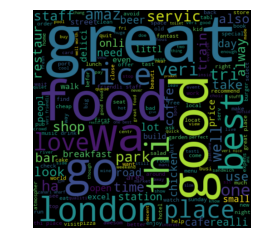

In [39]:
words = [word for sent in df_foursquare.clean_stem for word in sent]

wordcloud = WordCloud(width=480, height=480, margin=0).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

- Word Cloud for Lemmatization Cleaning

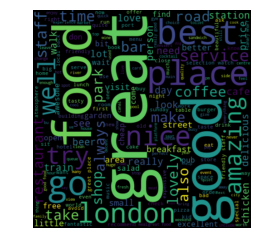

In [40]:
all_text = ' '.join(word for word in df_foursquare.lem_words)

wordcloud = WordCloud(width=480, height=480, margin=0).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# gensim. look at package to find out about what tags mean what???? and EDA on those tags
# lemmatize.func_dict look up!

From looking at the WordClouds I decided that lematisation may be the best option for the preprocessing. Stemming takes away.... the ....lasr bit of the word for normalisation however, it is very difficult to see what that original word once was. Lemitisation...n takes into account the context of the word in the sentece through speech tagging..... stemmnig normalization method

# Extracting Training data from ABSA xml
already labeled data from metashare. Undergo sentiment analysis annually on newviews
http://metashare.ilsp.gr:8080/repository/browse/semeval-2015-absa-restaurant-reviews-train-data/b2ac9c0c198511e4a109842b2b6a04d751e6725f2ab847df88b19ea22cb5cc4a/
https://stackoverflow.com/questions/32504950/training-dataset-for-sentiment-analysis-of-restaurant-reviews 

http://metashare.ilsp.gr:8080/repository/download/b2ac9c0c198511e4a109842b2b6a04d751e6725f2ab847df88b19ea22cb5cc4a/

In [68]:
import pprint as pp
import xml.etree.ElementTree as ET

xml_path = './NLP/ABSA15_RestaurantsTrain2/ABSA-15_Restaurants_Train_Final.xml'

def parse_data_2015(xml_path):
    container = []                                              
    reviews = ET.parse(xml_path).getroot()                      
    
    for review in reviews:  
        sentences = review.getchildren()[0].getchildren()       
        for sentence in sentences:                                  
            sentence_text = sentence.getchildren()[0].text          
            
            try:                                                     
                opinions = sentence.getchildren()[1].getchildren()
            
                for opinion in opinions:                                
                    polarity = opinion.attrib["polarity"]
                    target = opinion.attrib["target"]
        
                    row = {"sentence": sentence_text, "polarity":polarity}   
                    container.append(row)                                                              
                
            except IndexError: 
                row = {"sentence": sentence_text}        
                container.append(row)                                                               
                
    return pd.DataFrame(container)

ABSA_df = parse_data_2015(xml_path)
ABSA_df.head()

/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  del sys.path[0]
/Users/annabopeep/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()


,polarity,sentence
0,negative,Judging from previous posts this used to be a ...
1,negative,"We, there were four of us, arrived at noon - t..."
2,negative,"They never brought us complimentary noodles, i..."
3,negative,The food was lousy - too sweet or too salty an...
4,negative,The food was lousy - too sweet or too salty an...


## Preprocessing Training Data

In [69]:
ABSA_clean = cleaning_normalization(ABSA_df.sentence)
ABSA_training = separate_words_type(ABSA_clean)


A Jupyter Widget

In [70]:
# concat cleaned text with original
df_training = pd.concat([ABSA_df, ABSA_training], axis=1)

# the classes of the polarity
print ABSA_df.polarity.value_counts()

# converting the polarity to numeric values
df_training['polarity']= ABSA_df.polarity.map(lambda x: int(2) if x =='positive' else int(0) if x =='negative' else int(1) if x == 'neutral' else np.nan)
df_training['polarity'].value_counts()
df_training.head()

positive    1198
negative     403
neutral       53
Name: polarity, dtype: int64


,polarity,sentence,lem_words,lem_type
0,0.0,Judging from previous posts this used to be a ...,judge previous post used be good place not longer,VB JJ NN VB VB JJ NN RB JJ
1,0.0,"We, there were four of us, arrived at noon - t...",be arrive noon place be empty staff act be imp...,VB VB NN NN VB JJ NN VB VB VB VB RB JJ
2,0.0,"They never brought us complimentary noodles, i...",never bring complimentary noodle ignore repeat...,RB VB JJ NN VB JJ NN NN VB NN NN
3,0.0,The food was lousy - too sweet or too salty an...,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ
4,0.0,The food was lousy - too sweet or too salty an...,food be lousy too sweet too salty portion tiny,NN VB JJ RB JJ RB JJ NN JJ


## Drop Null Values
- Because this is my labelled data, I do not want polarity values containing nulls

In [71]:
print 'Original Data:', df_training.shape
print 
print 'Null values Present in df :'
print df_training.isnull().sum()
print 
df_training = df_training.dropna(axis=0)
df_training = df_training.reset_index(drop=True)

print 'Null values dropped:', df_training.shape

Original Data: (1849, 4)

Null values Present in df :
polarity     195
sentence       0
lem_words      0
lem_type       0
dtype: int64

Null values dropped: (1654, 4)


- Dropping rows which appear null when opening csv (see at very end)

In [72]:
print df_training.shape
print df_foursquare.shape

(1654, 4)
(5173, 7)


In [73]:
# drop row 1176,1224 training
df_training = df_training.drop(df_training.index[[747]])
df_training = df_training.reset_index(drop=True)
print df_training.shape

# drop row 1604, 2937, 3610 testing
df_foursquare = df_foursquare.drop(df_foursquare.index[[1604, 2937, 3610]])
df_foursquare = df_foursquare.reset_index(drop=True)
print df_foursquare.shape

(1653, 4)
(5170, 7)


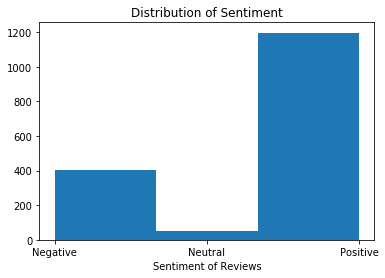

In [79]:
plt.hist(df_training.polarity, bins = 3, align= 'mid')
plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
plt.xlabel('Sentiment of Reviews')
plt.title('Distribution of Sentiment')
plt.show()

## Train Test Split + Bootstrapping
The use of a Train Test Split is to test how well our classifier is working for predicitons. https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
- after splitting the original training data i will boostrap the training data which will be used to train a model on.

- boostrapping 
balance the classes 0,1,2
sampling data most normal/closest to mean
sample from data with replacement

due to the shape! unbalanced classes! Since the training data is small a resampling method is used to increase its size. This ensures the sample of data is large enough to for the Central Limit Theorem to be true and so confidence intervals can give the boundary of the true mean (mu).

This data will be split with train_tets_split to analyse the model.


In [48]:
print df_training.polarity.value_counts()
print df_training.shape

2.0    1197
0.0     403
1.0      53
Name: polarity, dtype: int64
(1653, 4)


In [49]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_training, test_size=0.3, random_state=1)

t_1 = train[train['polarity']==1].sample(1000,replace=True)
t_2 = train[train['polarity']==2].sample(1000,replace=True)
t_3 = train[train['polarity']==0].sample(1000,replace=True)
training_bs = pd.concat([t_1, t_2, t_3])

print train.shape
print training_bs.shape
print test.shape

(1157, 4)
(3000, 4)
(496, 4)


## Save to csv

In [69]:
# training and testing to csv
# training_bs = training_bs.reset_index(drop=True)
# training_bs.to_csv('./training_data/training_bs.csv', header=True, index=False, encoding='UTF8')
# test = test.reset_index(drop=True)
# test.to_csv('./training_data/testing.csv', header=True, index=False, encoding='UTF8')
# training_bs.head()

,polarity,sentence,lem_words,lem_type
0,1.0,"those rolls were big, but not good and sashimi...",roll be big not good sashimi be not fresh,NN VB JJ RB JJ NN VB RB JJ
1,1.0,Service is average.,service be average,NN VB JJ
2,1.0,"Food was very good, but not what I would consi...",food be very good not consider world,NN VB RB JJ RB VB NN
3,1.0,The service was friendly and the atmosphere wa...,service be friendly atmosphere be casual,NN VB JJ NN VB JJ
4,1.0,"So close, but not good enough.",so close not good enough,RB JJ RB JJ JJ


In [70]:
# foursquare data saved
# df_foursquare = df_foursquare.reset_index(drop=True)
# df_foursquare.to_csv('foursquare_clean.csv', header=True, index=False, encoding='UTF8')
df_foursquare.head()

# describe data... comment on shape 3420 reviews 6807 words 

,tips,ll,lng,lat,clean_stem,lem_words,lem_type
0,Great fun to be had by everyone. The aquarium ...,"51.4409815123,-0.0613689422607",51.4409815123,51.4409815123,"[great, fun, everyon, aquarium, worth, small, ...",great fun be have everyone aquarium be small f...,JJ NN VB VB NN NN VB JJ NN VB NN VB NN NN VB NN
1,Love this place my new local shop,"51.4669013,0.0528256",51.4669013,51.4669013,"[love, thi, place, new, local, shop]",love place new local shop,VB NN JJ JJ NN
2,Enter our prize draw to win a family ticket to...,"51.501711493,-0.119767368051",51.501711493,51.501711493,"[enter, prize, draw, win, famili, ticket, sea,...",prize draw win family ticket sea life don win ...,NN NN VB NN NN NN NN VB VB RB VB RB VB JJ NN V...
3,"If you're pressed for time, head to Hall 2 for...","51.5352960617,-0.155888708427",51.5352960617,51.5352960617,"[press, time, head, hall, coral, amazonian, ex...",be press time head hall coral amazonian exhibi...,VB VB NN NN NN NN JJ NN NN VB RB JJ
4,Sea lion shows at 12pm and 3pm daily,"51.3495168852,-0.315634863588",51.3495168852,51.3495168852,"[sea, lion, show, daili]",sea lion show pm pm daily,NN NN VB NN NN RB


In [71]:
testing = pd.read_csv('foursquare_clean.csv', encoding='utf8')
print testing.isnull().sum()

training = pd.read_csv('./training_data/training_bs.csv', encoding='utf8')
print training.isnull().sum()
training[training.lem_words.isnull()]

tips          0
ll            0
lng           0
lat           0
clean_stem    0
lem_words     0
lem_type      0
dtype: int64
polarity     0
sentence     0
lem_words    0
lem_type     0
dtype: int64


,polarity,sentence,lem_words,lem_type


As I was loading the data I found that there were null values appearing. When referring back, these values came from the cleaning process and were converted to Null values when they were saved to csv.

### Null Values found preprocessing

In [ ]:
testing = pd.read_csv('./testing_data/testing.csv', encoding='utf8')
print testing.isnull().sum()
testing[testing.words.isnull()]

In the testing data null values were found at index 1792. When looking back the raw data is seen to be in a different language and therefore was recognised as forign words in the preprocessing step causing empty entries to be saved to the csv as Null values. 

In [ ]:
training = pd.read_csv('./training_data/training_bs.csv', encoding='utf8')
print training.isnull().sum()
training[training.lem_words.isnull()]

## EDA Training Data

In [50]:
training_bs.polarity.value_counts()

0.0    1000
2.0    1000
1.0    1000
Name: polarity, dtype: int64

In [51]:
train_p0 = training_bs[training_bs.polarity ==0]
train_p1 = training_bs[training_bs.polarity ==1]
train_p2 = training_bs[training_bs.polarity ==2]
train_p0.head()

,polarity,sentence,lem_words,lem_type
721,0.0,But the staff was so horrible to us.,staff be so horrible,NN VB RB JJ
266,0.0,"Then, to top things off, she dropped used silv...",then top thing drop used silverware boyfriend ...,RB VB NN VB JJ NN NN NN VB RB VB VB VB NN VB V...
1414,0.0,"While the ambiance and atmosphere were great, ...",ambiance atmosphere be great food service have...,NN NN VB JJ NN NN VB VB NN JJ
1092,0.0,They smell like they stuff them with old canne...,smell stuff old canned vegetable spinach mushr...,VB NN JJ JJ NN NN NN NN
381,0.0,The service was the only thing good about this...,service be only thing good restaurant,NN VB JJ NN JJ NN


In [52]:
from os import path
from PIL import Image

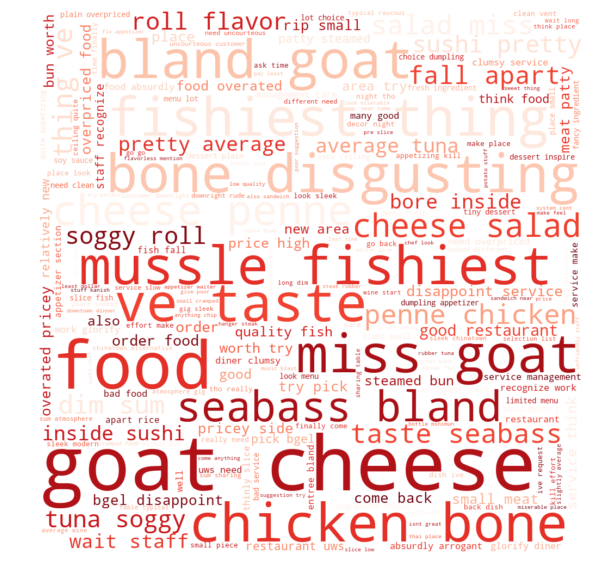

In [106]:
# Polarity == 0 negative
all_text = ' '.join(word for word in train_p0.lem_words)

# d = path.dirname('./NLP/sad.png')
# mask = np.array(Image.open(path.join(d, "sad.png")))

wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



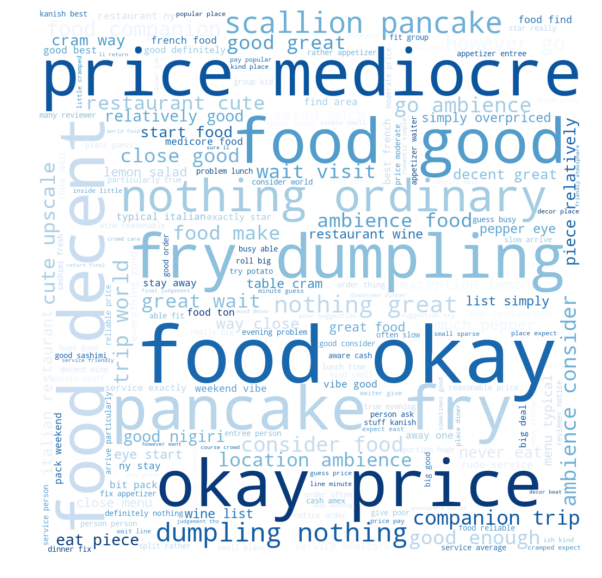

In [104]:
# Polarity == 1 neutral
all_text = ' '.join(word for word in train_p1.lem_words)

wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

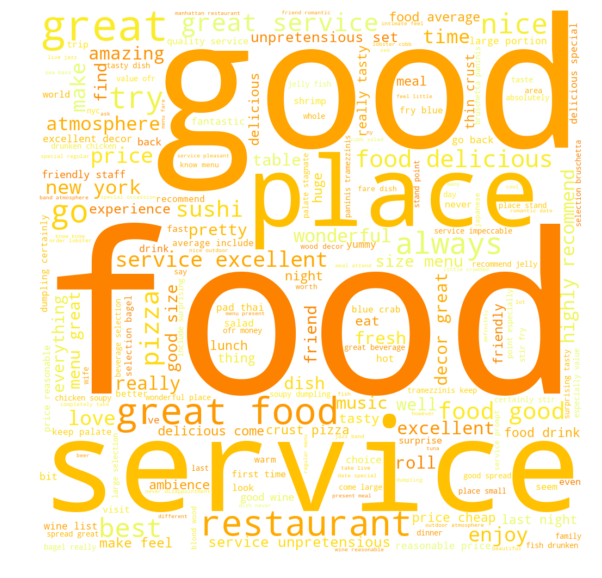

In [105]:
# Polarity == 2 positive
all_text = ' '.join(word for word in train_p2.lem_words)

p_up = path.dirname('./NLP/up_hole.png')
mask_up = np.array(Image.open(path.join(p_up, 'up_hole.png')))

wordcloud_p2 = WordCloud(width=1000, height=1000, colormap='Wistia',background_color='white', mode='RGBA').generate(all_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_p2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()